In [25]:
import json
import os

def convert_to_yolo(json_data):
    image_width = json_data["imageWidth"]
    image_height = json_data["imageHeight"]
    
    yolo_format = ""
    
    for shape in json_data["shapes"]:
        if shape["label"] != "trash":
            print("not trash detected in json")
            continue
        x1, y1 = shape["points"][0]
        x2, y2 = shape["points"][1]
        
        # Calculate center coordinates
        center_x = ((x1 + x2) / 2) / image_width
        center_y = (y1 + y2) / 2 / image_height
        
        # Calculate width and height
        width = abs(x2 - x1) / image_width
        height = abs(y2 - y1) / image_height

        # Append to YOLO format string
        yolo_format += f"{0} {center_x} {center_y} {width} {height}\n"
    
    return yolo_format.strip()

for path in ["../data/Dataset/training/", "../data/Dataset/validation/", "../data/Dataset/test/"]:
    for filename in os.listdir(path + "jsons"):
        with open(path + "jsons/" + filename) as json_file:
            data = json.load(json_file)
        
        yolo_format = convert_to_yolo(data)
            
        with open(path + "labels/" + filename.replace(".json", ".txt"), "w") as txt_file:
            txt_file.write(yolo_format)

0 0.41062127976190477 0.5621693121693121 0.11439732142857141 0.1785714285714286


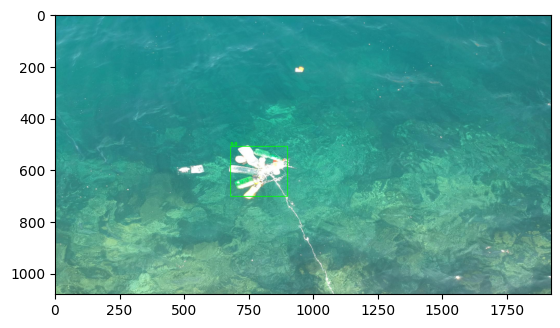

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_annotations(image_path, annotations_path):
    with open(annotations_path, "r") as file:
        annotations = file.readlines()
        annotations = [[float(x) for x in annotation.split(" ")] for annotation in annotations]

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    for annotation in annotations:
        label, center_x, center_y, w, h = annotation
        x1 = int((center_x - w/2) * width)
        y1 = int((center_y - h/2) * height)
        x2 = int((center_x + w/2) * width)
        y2 = int((center_y + h/2) * height)

        color = (0, 255, 0)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, str(label), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    plt.imshow(image)
    plt.show()

annotations_path = "../data/Dataset/training/labels/train_image1.txt"
image_path = "../data/Dataset/training/images/train_image1.JPG"


display_annotations(image_path, annotations_path)

In [24]:
import torch
from ultralytics import YOLO

model = YOLO("yolov8n.pt").to(torch.device("cpu"))  # load a pretrained model (recommended for training)
model.train(data="../data/Dataset/yolo.yaml", epochs=20)  # train the model

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../data/Dataset/yolo.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=Fals

train: Scanning /mnt/dane/projekty/studia/mgr3_dubrovnik/Trash-detection-/data/Dataset/training/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
val: Scanning /mnt/dane/projekty/studia/mgr3_dubrovnik/Trash-detection-/data/Dataset/validation/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

Plotting labels to runs/detect/train12/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2024/04/25 09:19:07 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of transformers. If you encounter errors during autologging, try upgrading / downgrading transformers to a supported version, or try upgrading MLflow.
2024/04/25 09:19:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.
2024/04/25 09:19:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


MLflow: logging run_id(94583bc9b657426bb3c5f3dfba43c79f) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train12
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.387       4.56     0.9863          7        640: 100%|██████████| 2/2 [00:07<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         20         36    0.00517      0.861        0.1     0.0467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.642      4.631      1.063          5        640: 100%|██████████| 2/2 [00:05<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         20         36    0.00517      0.861      0.122     0.0461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.579      4.051       1.09         11        640: 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         20         36    0.00567      0.944      0.153     0.0665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.537      4.073      1.072          7        640: 100%|██████████| 2/2 [00:05<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

                   all         20         36      0.006          1      0.242        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.277      3.748      1.028          6        640: 100%|██████████| 2/2 [00:06<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

                   all         20         36      0.006          1      0.304       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.412      2.945     0.9536          9        640: 100%|██████████| 2/2 [00:06<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         20         36    0.00583      0.972      0.392      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.275      2.938      0.899          5        640: 100%|██████████| 2/2 [00:06<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

                   all         20         36    0.00567      0.944      0.347      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.269      2.222     0.9062          7        640: 100%|██████████| 2/2 [00:06<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]

                   all         20         36    0.00583      0.972      0.351      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.111      1.854     0.9298          9        640: 100%|██████████| 2/2 [00:08<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]

                   all         20         36     0.0055      0.917      0.306      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.133      1.906     0.9335          6        640: 100%|██████████| 2/2 [00:07<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]

                   all         20         36     0.0055      0.917      0.312      0.123


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.379      3.473      1.061          4        640: 100%|██████████| 2/2 [00:07<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         20         36    0.00567      0.944      0.176     0.0919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.393      3.265      1.019          4        640: 100%|██████████| 2/2 [00:07<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all         20         36    0.00583      0.972      0.135     0.0724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.639       3.13      1.031          4        640: 100%|██████████| 2/2 [00:07<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         20         36    0.00583      0.972     0.0915     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G       1.18      2.639     0.9294          4        640: 100%|██████████| 2/2 [00:07<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

                   all         20         36    0.00583      0.972     0.0686     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.184      2.223      0.976          4        640: 100%|██████████| 2/2 [00:07<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

                   all         20         36      0.006          1     0.0818     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G       1.13      2.667     0.9899          4        640: 100%|██████████| 2/2 [00:07<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

                   all         20         36      0.006          1     0.0343     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G       1.12      2.348     0.9498          4        640: 100%|██████████| 2/2 [00:07<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all         20         36      0.006          1     0.0395     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.093      2.121      1.004          4        640: 100%|██████████| 2/2 [00:07<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all         20         36      0.006          1     0.0391     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.156      2.336     0.9392          4        640: 100%|██████████| 2/2 [00:07<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]

                   all         20         36      0.006          1     0.0393     0.0135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.8554      2.266     0.9098          4        640: 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]

                   all         20         36      0.006          1     0.0399     0.0138



20 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 6.2MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.12.2 torch-2.3.0+cu121 CPU (Intel Core(TM) i5-8265U 1.60GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


                   all         20         36    0.00583      0.972      0.392      0.153
Speed: 1.0ms preprocess, 53.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train12
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7278dd9a1a00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [25]:
import os

for filename in os.listdir("../data/Dataset/training/images/"):
    results = model("../data/Dataset/training/images/" + filename, conf=0.1)
    results[0].show()




image 1/1 /mnt/dane/projekty/studia/mgr3_dubrovnik/Trash-detection-/src/../data/Dataset/training/images/train_image1.JPG: 384x640 (no detections), 62.7ms
Speed: 2.4ms preprocess, 62.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /mnt/dane/projekty/studia/mgr3_dubrovnik/Trash-detection-/src/../data/Dataset/training/images/train_image10.JPG: 384x640 (no detections), 64.2ms
Speed: 2.2ms preprocess, 64.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /mnt/dane/projekty/studia/mgr3_dubrovnik/Trash-detection-/src/../data/Dataset/training/images/train_image11.JPG: 384x640 (no detections), 85.0ms
Speed: 2.8ms preprocess, 85.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /mnt/dane/projekty/studia/mgr3_dubrovnik/Trash-detection-/src/../data/Dataset/training/images/train_image12.JPG: 384x640 (no detections), 82.1ms
Speed: 2.4ms preprocess, 82.1ms inference, 0.6ms postprocess per image at shape (1, 3,

In [23]:
metrics = model.val()
metrics.results_dict

Ultralytics YOLOv8.2.2 🚀 Python-3.12.2 torch-2.3.0+cu121 CPU (Intel Core(TM) i5-8265U 1.60GHz)


val: Scanning /mnt/dane/projekty/studia/mgr3_dubrovnik/Trash-detection-/data/Dataset/validation/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         20         36    0.00583      0.972      0.312      0.116
Speed: 0.9ms preprocess, 43.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train112


{'metrics/precision(B)': 0.005833333333333334,
 'metrics/recall(B)': 0.9722222222222222,
 'metrics/mAP50(B)': 0.3122323169312901,
 'metrics/mAP50-95(B)': 0.11639453946531561,
 'fitness': 0.13597831721191306}

In [15]:
%load_ext tensorboard
%tensorboard --logdir runs

UsageError: Line magic function `%tensorboard` not found.


# Roboflow dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FvqF3j07aqqT0BqM0VjB")
project = rf.workspace("chinatele").project("waste-in-water")
version = project.version(1)
dataset = version.download("yolov8")


# FROM FILE

In [19]:
# Load the saved model for inference
loaded_model = YOLO("../yolov8n_trained.pt").to("cpu")

In [20]:
# import os
# os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
# Use the loaded model for inference
results = loaded_model("../data/Dataset/test/images/test_image1.JPG")


image 1/1 /mnt/dane/projekty/studia/mgr3_dubrovnik/Trash-detection-/src/../data/Dataset/test/images/test_image1.JPG: 384x640 1 person, 83.7ms
Speed: 2.8ms preprocess, 83.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


In [21]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [51]:
import torch
import cv2
from torchvision import transforms
model = torch.load("../yolov8n_trained.pt")["model"].to(torch.device("cpu"))

image = cv2.imread("../data/Dataset/test/images/test_image1.JPG")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
transform = transforms.ToTensor()
image_tensor = transform(image_rgb)

# Add a batch dimension to the tensor
image_tensor = image_tensor.unsqueeze(0).to(torch.device("cpu"))  # Add batch dimension (1, C, H, W)


# Use the model for inference
results = model(image_tensor)

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 136 but got size 135 for tensor number 1 in the list.